#Connect to the Server as Root

Many of the commands you will be executing will require root privileges. Connect to your Linux server as the root user. If you log with another account, switch to the root account.


In [ ]:
su -

#Install Apache
Start off by installing the Apache HTTP Server. You'll also need to install "mod_ssl" to add SSL support to Apache.

In [ ]:
yum install -y httpd mod_ssl

#Start and Enable the Web Server

Now that the web server is installed, you can go ahead and start it. You also want it to start on boot, so enable the service as well.


In [ ]:
systemctl start httpd systemctl enable httpd

You can verify the web server started by checking its status.

In [ ]:
systemctl status httpd

You can also use the is-active option to systemctl.

In [ ]:
systemctl is-active httpd

#Create a Sample Web Page

Create an index.html file in the DocumentRoot of the web server.


In [ ]:
echo demo > /var/www/html/index.html

##Allow Inbound HTTP Traffic

If you are using the local Linux firewall, run the following commands to allow HTTP and HTTPS traffic:


In [ ]:
firewall-cmd --permanent --zone=public --add-service=http
firewall-cmd --permanent --zone=public --add-service=https
firewall-cmd --reload

#Test the Web Server

Open up a web browser and connect to your server. Remember, that you should have a DNS record associated with your server.
First, connect using the HTTP protocol. In this example, I am using http://demo.example.com


In [ ]:
#check the web server from the command line using the curl utility:

In [ ]:
curl http://demo.linuxtrainingacademy.com
curl https://demo.linuxtrainingacademy.com

Curl will also generate an error due to the self-signed SSL certificate. You can use the -k option to force curl to ignore the invalid SSL cert.

In [ ]:
curl -k https://demo.example.com

#Installing CerrtBOT Application

In [ ]:
yum install -y epel-release
yum install -y certbot
yum search certbot

In [ ]:
yum info certbot

Installing Apache Cert BOT plugin

In [ ]:
yum install -y python2-certbot-apache

 Requesting an SSL Certificate from Let's Encrypt

In [ ]:
certbot --apache -d demo.example.com

In [ ]:
[root@demo ~]# certbot --apache -d demo.example.com Saving debug log to <log_file>
Enter email address (used for urgent renewal and security notices) (Enter 'c' to cancel):DakshitaV@gmail.com
Starting new HTTPS connection (1): acme-v01.api.letsencrypt.org

Please read the Terms of Service at
https://letsencrypt.org/documents/LE-SA-v1.1.1-August-1-2016.pdf. You must agree in order to register with the ACME server at
https://acme-v01.api.letsencrypt.org/directory (A)gree/(C)ancel: a

Would you be willing to share your email address with the Electronic Frontier Foundation, a founding partner of the Let's Encrypt project and the non-profit organization that develops Certbot? We'd like to send you email about EFF and our work to encrypt the web, protect its users and defend digital rights.

(Y)es/(N)o: y
Obtaining a new certificate Performing the following challenges:
tls-sni-01 challenge for demo.example.com

We were unable to find a vhost with a ServerName or Address of demo.example.com.
Which virtual host would you like to choose?
(note: conf files with multiple vhosts are not yet supported)

1: ssl.conf	|	| HTTPS | Enabled

Press 1 [enter] to confirm the selection (press 'c' to cancel): 1 Waiting for verification...
Cleaning up challenges

We were unable to find a vhost with a ServerName or Address of demo.example.com.
Which virtual host would you like to choose?
(note: conf files with multiple vhosts are not yet supported)

1: ssl.conf	|	| HTTPS | Enabled

Press 1 [enter] to confirm the selection (press 'c' to cancel): 1 Deploying Certificate for demo.example.com to VirtualHost
/etc/httpd/conf.d/ssl.conf

Please choose whether HTTPS access is required or optional.

1: Easy - Allow both HTTP and HTTPS access to these sites
2: Secure - Make all requests redirect to secure HTTPS access


Select the appropriate number [1-2] then [enter] (press 'c' to cancel): 2

Congratulations! You have successfully enabled https://demo.example.com

You should test your configuration at: https://www.ssllabs.com/ssltest/analyze.html?d=demo.example.com


IMPORTANT NOTES:
-	Congratulations! Your certificate and chain have been saved at
/etc/files/live/demo.example.com/fullchain.pem. Your cert will expire on 2025-11-08. To obtain a new or tweaked version of this certificate in the future, simply run certbot again with the "certonly" option. To non-interactively renew *all* of your certificates, run "certbot renew"
-	Your account credentials have been saved in your Certbot configuration directory at /etc/letsencrypt. You should make a secure backup of this folder now. This configuration directory will also contain certificates and private keys obtained by Certbot so making regular backups of this folder is ideal.
-	If you like Certbot, please consider supporting our work by:

Donating to ISRG / Let's Encrypt:	https://letsencrypt.org/donate Donating to EFF:	https://eff.org/donate-le

[root@demo ~]#


Renewing SSL Certificates

SSL Certificates issued by Let's Encrypt are valid for 90 days. To attempt an SSL Certificate renewal, use the Certbot application


In [ ]:
certbot renew

In [ ]:
crontab -e

In [ ]:
# Renew SSL Certificates Daily
0 0 * * * /usr/bin/certbot renew &>/var/log/certbot.cronlog


In [ ]:
crontab -l

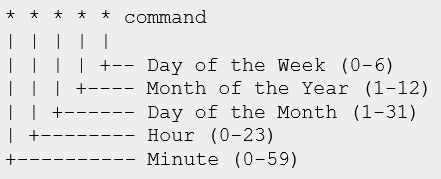


SSL certificate that will be automatically renewed